In [32]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

1. La ecuacion de magnetización esta expresada como funcion de m(T), por lo tanto la ecuacion a resolver es la siguiente.

$m(T) - tanh(\frac{m(T)}{T}) = 0$

In [33]:
#Definir la duncion de magnetización
T = 0.5
f = lambda mT : mT-np.tanh(mT/T)

In [41]:
#a Metodo de la secante
m_sec = optimize.newton(f,2,)
m_pun = optimize.fixed_point(g,2)
print("Metodo de la secante =",round(m_sec,4))

Metodo de la secante = 0.9575


In [43]:
#b Metodo del punto fijo
g = lambda mT : mT-f(mT)
m_pun = optimize.fixed_point(g,2)
print("Metodo del punto fijo =",m_pun)

Metodo del punto fijo = 0.9575040240772688


In [45]:
#d 
T = np.linspace(0.1,0.99,100)

2. Punto del dataset

In [154]:
#a. Lectura del archivo
url = "https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/main/Entregas/Parciales/Parcial1/dataset/Temperature_Bogota_Barcelona.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,Year,City,Month,Day,AvgTemperature
0,0,1995,Barcelona,6.526027,15.720548,62.019178
1,1,1995,Bogota,6.526027,15.720548,54.963014
2,2,1996,Barcelona,6.513661,15.756831,61.125956
3,3,1996,Bogota,6.513661,15.756831,55.083333
4,4,1997,Barcelona,6.526027,15.720548,62.612329
5,5,1997,Bogota,6.526027,15.720548,56.231507
6,6,1998,Barcelona,6.526027,15.720548,60.273973
7,7,1998,Bogota,6.526027,15.720548,49.642466
8,8,1999,Barcelona,6.526027,15.720548,61.204658
9,9,1999,Bogota,6.526027,15.720548,52.231781


In [157]:
#Eliminar las columnas Month,Day,Unnamed: 0
df_1 = df.drop(["Month","Day","Unnamed: 0"],axis=1)

In [173]:
# Adicionar una nueva columna
c = ((df["AvgTemperature"]-32)/1.8)
df_2 = df_1.assign(AvgTempCelcius = c )

In [175]:
df_3 = df_2.drop(["AvgTemperature"],axis=1)

In [235]:
#Graficar la temperatura en funcion del año
df_4 = df_3[df_3.City=="Bogota"]
df_5 = df_3[df_3.City =="Barcelona"]

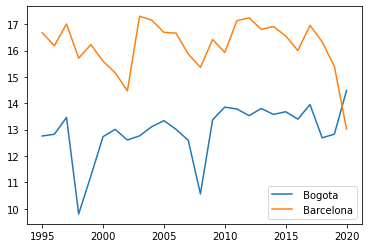

In [239]:
# puntos d) y e) Graficas de la temperatura en funcion del año
fig, ax=plt.subplots()
ax.plot(df_4["Year"],df_4["AvgTempCelcius"],label=" Bogota",)
ax.plot(df_5["Year"],df_5["AvgTempCelcius"],label = " Barcelona")
plt.legend()
plt.show()

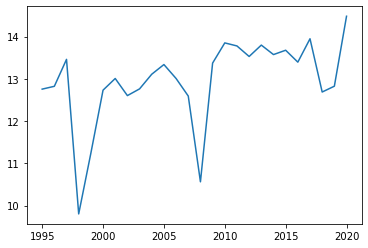

In [297]:
#f
from numpy.linalg import solve
H = np.polynomial.hermite.Hermite.fit(df_4.Year,df_4.AvgTempCelcius,5)
x = np.linspace(df_4.Year,df_4.Year,100)
plt.plot(df_4.Year,df_4.AvgTempCelcius)
plt.plot(x,H(x),"-")
plt.show()
